# Support Vector Machines (SVMs)

## Support Vector Machines

A [support vector machine](https://en.wikipedia.org/wiki/Support_vector_machine) constructs a hyperplane or set of hyperplanes in a high- or infinite-dimensional space, which can be used for classification, regression, or other tasks. Given a set of data points that belong to either of two classes, an SVM finds the hyperplane that:

* Leaves the largest possible fraction of points of the same class on the same side.
* Maximizes the distance of either class from the hyperplane.
* Find the optimal separating hyperplane that minimizes the risk of misclassifying the training samples and unseen test samples.

![SVM](http://nikbearbrown.com/YouTube/MachineLearning/IMG/SVM.png)  
*SVM*  


Pseudocode

Given a  guess of width and bias we can:

* Compute whether all data points are in the correct half-planes.  
* Compute the width of the margin.  
* Search the space of  width’s and bias to find the widest margin that matches all the datapoints.  


## Kernels

It is much easier and efficient to find Separating boundaries which are in the form of a straight lines as oppossed to curvy Separating boundaries. Kernels help us turn a linear classifier into a non-linear one. That is, they transform a curvy separating boundary that is only non-linearly separable to a linearly separable discriminant in a higher dimensional space.

![Kernels](http://nikbearbrown.com/YouTube/MachineLearning/IMG/Kernels.png)

### Kernels (1-D Example)

For example, squaring the data may take some points that are not linearly separable in 1-D space to be linearly separable in 2D space.

![Kernels](http://nikbearbrown.com/YouTube/MachineLearning/IMG/Kernels_1D_2D.png)

![Kernel Machine](http://nikbearbrown.com/YouTube/MachineLearning/IMG/Kernel_Machine.png)

## Kernel Trick 

While coming up with functions that map linearly separable sets to   SVM, we only need to know the inner product of vectors in the linearly separable sets in higher dimensional spaces arbitrarily  coordinate space.

Computing the kernel of x and y gives the same result as the dot product in the mapped (high-dimensional) space. The mappings used by SVM schemes are designed to ensure that dot products may be computed easily in terms of the variables in the original space, by defining them in terms of a kernel function k(x,y) selected to suit the problem. This "Kernel trick" is" essentially is to define a similarity function in terms of original space itself without even defining (or even knowing), what the transformation function K will be. 

## Linear SVM

Support Vectors are those datapoints that the margin pushes up against

Given some training data $\mathcal{D}$, a set of n points of the form
$\mathcal{D} = \left\{ (\mathbf{x}_i, y_i)\mid\mathbf{x}_i \in \mathbb{R}^p,\, y_i \in \{-1,1\}\right\}_{i=1}^n$
where the $y_i$ is either 1 or −1, indicating the class to which the point $\mathbf{x}_i$ belongs. Each  $\mathbf{x}_i$  is a p-dimensional real vector. We want to find the maximum-margin hyperplane that divides the points having $y_i=1$ from those having $y_i=-1$. Any hyperplane can be written as the set of points $\mathbf{x}$ satisfying $\mathbf{w}\cdot\mathbf{x} - b=0$, where $\mathbf{w}\cdot\mathbf{x}$,denotes the dot product of $\mathbf{w}$ and $\mathbf{x}$, The variable ${\mathbf{w}}$ is the (not necessarily normalized) normal vector to the hyperplane. The parameter $\tfrac{b}{\|\mathbf{w}\|}$ determines the offset of the hyperplane from the origin along the normal vector ${\mathbf{w}}$.

![Linear SVM](http://nikbearbrown.com/YouTube/MachineLearning/IMG/Maximum_Margin_Classification_SVM.png)  
*Linear SVM*  


# Non-Linear SVM

Non-linear classifiers are created by applying the kernel trick then generating maximum-margin hyperplanes.


## Support Vector Machines in python

In [61]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import warnings
import random
from datetime import datetime
random.seed(datetime.now())
warnings.filterwarnings('ignore')

from matplotlib import style
style.use("ggplot")
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn import cross_validation # used to test classifier
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn import metrics



In [62]:
# Generate random numbers and create a pandas dataframe

np.random.seed(3333) # To generate the same number sequence every time
x=np.random.uniform(-2, 2, (20, 2))
x=pd.DataFrame(x,columns=['X','Y'])


# First 10 elements of Y are -1 and the rest are 1

y=np.repeat([-1,1], [10, 10], axis=0)
y=pd.DataFrame(y,columns=['X'])


# Add 1 to the last 10 rows of x

x[y['X']==1]=x[y['X']==1]+1

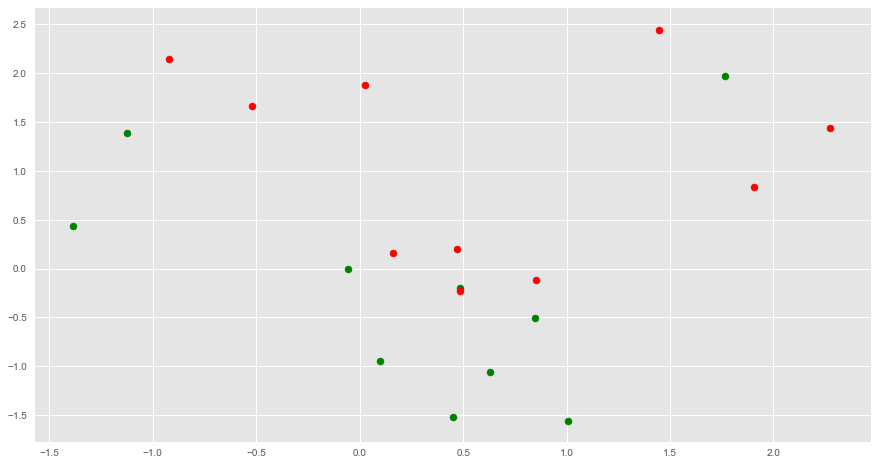

In [63]:
# Checking if Classes are Linearly Separable

plt.figure(figsize=(15,8))
plt.scatter(x.loc[:9,'X'],x.loc[:9,'Y'],c='g')
plt.scatter(x.loc[10:19,'X'],x.loc[10:19,'Y'],c='r')
plt.show()

In [64]:
# Training a model on the data

linKernel = svm.SVC(kernel='linear', C = 1.0)
linKernel.fit(x[['X','Y']].values,y['X'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Let's focus on Predicting the Function

In [65]:
# Generate Test data

xTest=np.random.uniform(-2, 2, (20, 2))
xTest=pd.DataFrame(xTest,columns=['X','Y'])


# First 10 elements of Y are -1 and the rest are 1

yTest=np.repeat([-1,1], [10, 10], axis=0)
yTest=pd.DataFrame(yTest,columns=['X'])

# Add 1 to the last 10 rows of xTest
xTest[yTest['X']==1]=xTest[yTest['X']==1]+1

### Predict test data based on model

In [66]:
# Predicted values
linKernel.predict(xTest[['X','Y']].values)

array([ 1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1,  1,  1,
        1,  1, -1])

In [67]:
# Predicted values

linPredicted=linKernel.predict(xTest[['X','Y']].values)


# Confusion Matrix for performance of Classification 

matrix=confusion_matrix(yTest, linPredicted)
print(matrix)

[[4 6]
 [4 6]]


In [68]:
True_Negative, False_Positive, False_Negative, True_Positive=confusion_matrix(yTest, linPredicted).ravel()
(True_Negative, False_Positive, False_Negative, True_Positive)

(4, 6, 4, 6)

In [69]:
# Classification report for the SVM Kernel="linear"

report = classification_report(yTest, linPredicted)
print(report)

             precision    recall  f1-score   support

         -1       0.50      0.40      0.44        10
          1       0.50      0.60      0.55        10

avg / total       0.50      0.50      0.49        20



## SVM with RBF kernel

In machine learning, the (**Gaussian**) **[radial basis function]
kernel**, or **RBF kernel**, is a popular kernel function used in
various kernelized]] learning algorithms. In particular, it is commonly
used in [support vector machine](https://en.wikipedia.org/wiki/Support_vector_machine) classification.

The RBF kernel on two samples **x** and **x**', represented as feature
vectors in some *input space*, is defined as

$$K(\mathbf{x}, \mathbf{x'}) = \exp\left(-\frac{\|\mathbf{x} - \mathbf{x'}\|^2}{2\sigma^2}\right)$$

$\textstyle\|\mathbf{x} - \mathbf{x'}\|^2$ may be recognized as the
[squared Euclidean distance] between the two feature vectors. $\sigma$
is a free parameter. An equivalent, but simpler, definition involves a
parameter $\textstyle\gamma = \tfrac{1}{2\sigma^2}$:

$$K(\mathbf{x}, \mathbf{x'}) = \exp(-\gamma\|\mathbf{x} - \mathbf{x'}\|^2)$$

Since the value of the RBF kernel decreases with distance and ranges
between zero (in the limit) and one (when **x**'}}), it has a ready
interpretation as a similarity measure.

In [70]:
# Predictive Model using rbf Kernel

rbfKernel = svm.SVC(kernel='rbf', gamma=0.7, C=1.0)
rbfKernel.fit(x[['X','Y']].values,y['X'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.7, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [71]:
# Predicted values using RBF kernel
rbfPredicted=rbfKernel.predict(xTest[['X','Y']].values)

# Confusion Matrix for performance of Classification
matrix=confusion_matrix(yTest, rbfPredicted)
print(matrix)

[[3 7]
 [2 8]]


In [72]:
True_Negative, False_Positive, False_Negative, True_Positive=confusion_matrix(yTest, rbfPredicted).ravel()
(True_Negative, False_Positive, False_Negative, True_Positive)

(3, 7, 2, 8)

In [73]:
# Classification report for the SVM Kernel="RBF"

report = classification_report(yTest, rbfPredicted)
print(report)

             precision    recall  f1-score   support

         -1       0.60      0.30      0.40        10
          1       0.53      0.80      0.64        10

avg / total       0.57      0.55      0.52        20



## SVM with Polynomial (degree 3) kernel

In [74]:
# Predictive Model using Polynomial Kernel

polyKernel = svm.SVC(kernel='poly', degree=3, C=1.0)
polyKernel.fit(x[['X','Y']].values,y['X'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [75]:
# Predicted values using Polynomial kernel

polyPredicted=polyKernel.predict(xTest[['X','Y']].values)

# Confusion Matrix for performance of Classification

matrix=confusion_matrix(yTest, polyPredicted)
print(matrix)

[[5 5]
 [5 5]]


In [76]:
# Classification report for the SVM Kernel="Polynomial"

report = classification_report(yTest,polyPredicted)
print(report)

             precision    recall  f1-score   support

         -1       0.50      0.50      0.50        10
          1       0.50      0.50      0.50        10

avg / total       0.50      0.50      0.50        20



## GridSearch.CV() to set best choice of kernel, C, and gamma

### Grid search

The traditional way of performing hyperparameter optimization has been
*grid search*, or a *parameter sweep*, which is simply an [exhaustive
searching] through a manually specified subset of the hyperparameter
space of a learning algorithm. A grid search algorithm must be guided by
some performance metric, typically measured by cross-validation on the
training set or evaluation on a held-out validation set.

Since the parameter space of a machine learner may include real-valued
or unbounded value spaces for certain parameters, manually set bounds
and discretization may be necessary before applying grid search.

For example, a typical soft-margin SVM classifier equipped with an
[RBF kernel] has at least two hyperparameters that need to be tuned for
good performance on unseen data: a regularization constant *C* and a
kernel hyperparameter γ. Both parameters are continuous, so to perform
grid search, one selects a finite set of “reasonable” values for each,
say

$$C \in \{10, 100, 1000\}$$

$$\gamma \in \{0.1, 0.2, 0.5, 1.0\}$$

Grid search then trains an SVM with each pair (*C*, γ) in the [Cartesian
product] of these two sets and evaluates their performance on a held-out
validation set (or by internal cross-validation on the training set, in
which case multiple SVMs are trained per pair). Finally, the grid search
algorithm outputs the settings that achieved the highest score in the
validation procedure.

Grid search suffers from the [curse of dimensionality], but is often
[embarrassingly parallel] because typically the hyperparameter settings
it evaluates are independent of each other.

In [77]:
# Predictive Model using GridSearch.CV()

parameters = {'kernel':('linear', 'rbf'), 'C':[1,2,3,4,5,6,7,8,9,10], 'gamma': [0.01,0.02,0.03,0.04,0.05,0.10,0.2,0.3,0.4,0.5]}
svr = svm.SVC()
grid = GridSearchCV(svr, parameters)
grid.fit(x[['X','Y']].values,y['X'])

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'gamma': [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [78]:
predictedGrid = grid.predict(xTest[['X','Y']].values)
grid_matrix = confusion_matrix(yTest, predictedGrid)
print(grid_matrix)

[[4 6]
 [4 6]]


In [79]:
# Classification report for the GridSearch.cv()

report = classification_report(yTest,predictedGrid)
print(report)

             precision    recall  f1-score   support

         -1       0.50      0.40      0.44        10
          1       0.50      0.60      0.55        10

avg / total       0.50      0.50      0.49        20



## Breast Cancer Wisconsin (Diagnostic) Data Set

In the project we'll be using the _Breast Cancer Wisconsin (Diagnostic) Data Set_ to predict whether the cancer is benign or malignant. 

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This data set is from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

This data set is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

In [80]:
field_names_df = pd.read_table('http://nikbearbrown.com/YouTube/MachineLearning/DATA/wpbc_data_field_names.txt',header=None)
field_names=field_names_df[0].tolist()
field_names

['ID',
 'diagnosis',
 'radius_mean',
 'radius_sd_error',
 'radius_worst',
 'texture_mean',
 'texture_sd_error',
 'texture_worst',
 'perimeter_mean',
 'perimeter_sd_error',
 'perimeter_worst',
 'area_mean',
 'area_sd_error',
 'area_worst',
 'smoothness_mean',
 'smoothness_sd_error',
 'smoothness_worst',
 'compactness_mean',
 'compactness_sd_error',
 'compactness_worst',
 'concavity_mean',
 'concavity_sd_error',
 'concavity_worst',
 'concave_points_mean',
 'concave_points_sd_error',
 'concave_points_worst',
 'symmetry_mean',
 'symmetry_sd_error',
 'symmetry_worst',
 'fractal_dimension_mean',
 'fractal_dimension_sd_error',
 'fractal_dimension_worst']

In [81]:
breast_cancer = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',header=None,names = field_names)
breast_cancer.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [82]:
#data formating ID is a non-informative column
breast_cancer = breast_cancer.drop("ID", 1)
breast_cancer.head()

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [83]:
breast_cancer.groupby('diagnosis').count()

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,357
M,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,212


In [84]:
breast_cancer.describe()

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [85]:
breast_cancer.groupby('diagnosis').median()

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.200,17.39,78.18,458.4,0.09076,0.07529,0.03709,0.02344,0.1714,0.061540,...,13.35,22.820,86.92,547.4,0.12540,0.16980,0.1412,0.07431,0.2687,0.07712
M,17.325,21.46,114.20,932.0,0.10220,0.13235,0.15135,0.08628,0.1899,0.061575,...,20.59,28.945,138.00,1303.0,0.14345,0.35635,0.4049,0.18200,0.3103,0.08760


In [86]:
breast_cancer.groupby('diagnosis').mean()

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [87]:
def scaled_df(df):
    scaled = pd.DataFrame()
    for item in df:
        if item in df.select_dtypes(include=[np.float]):
            scaled[item] = ((df[item] - df[item].min()) / 
            (df[item].max() - df[item].min()))
        else: 
            scaled[item] = df[item]
    return scaled
breast_cancer_scaled = scaled_df(breast_cancer)

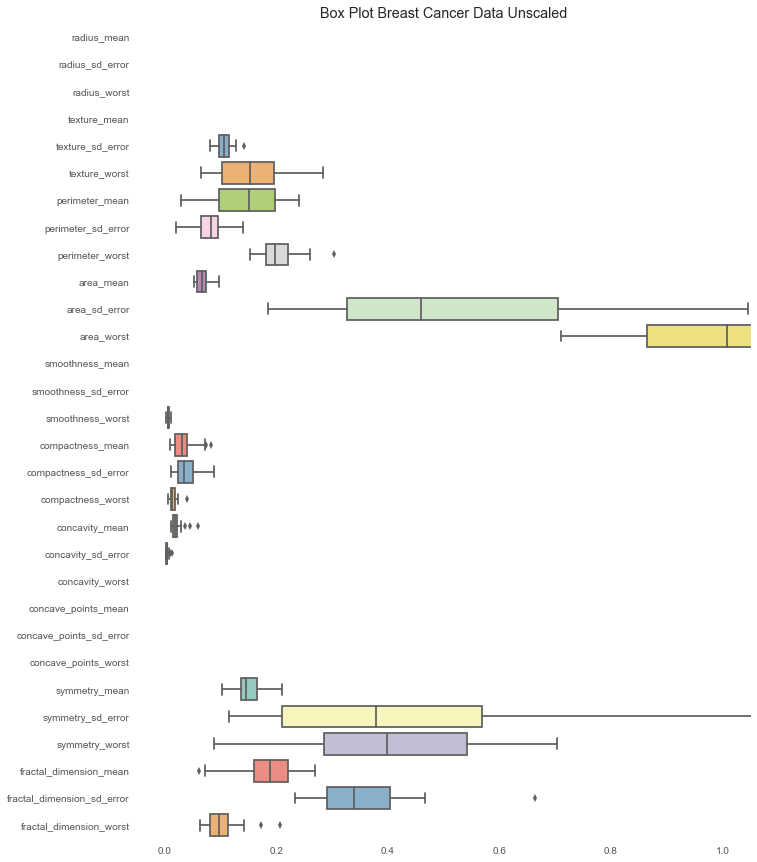

In [88]:
f, ax = plt.subplots(figsize=(11, 15))

ax.set_axis_bgcolor('#FFFFFF')
plt.title("Box Plot Breast Cancer Data Unscaled")
ax.set(xlim=(-.05, 1.05))
ax = sns.boxplot(data = breast_cancer[1:29], 
  orient = 'h', 
  palette = 'Set3')

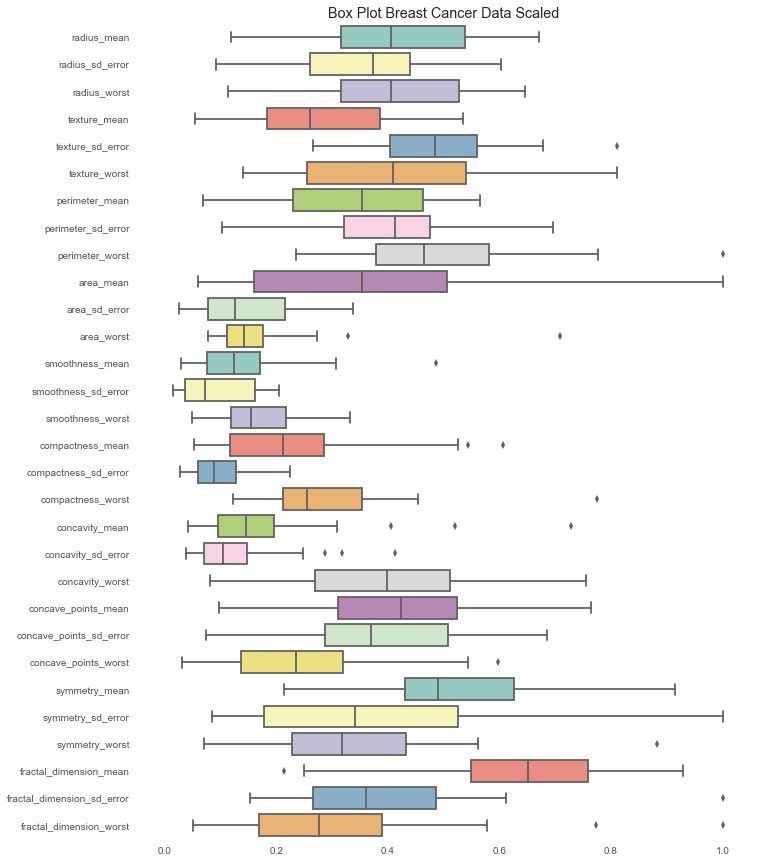

In [89]:
f, ax = plt.subplots(figsize=(11, 15))

ax.set_axis_bgcolor('#FFFFFF')
plt.title("Box Plot Breast Cancer Data Scaled")
ax.set(xlim=(-.05, 1.05))
ax = sns.boxplot(data = breast_cancer_scaled[1:29], 
  orient = 'h', 
  palette = 'Set3')

In [90]:
predictor_names=field_names_df[0].tolist()
predictor_names=predictor_names[2:]
predictor_names

['radius_mean',
 'radius_sd_error',
 'radius_worst',
 'texture_mean',
 'texture_sd_error',
 'texture_worst',
 'perimeter_mean',
 'perimeter_sd_error',
 'perimeter_worst',
 'area_mean',
 'area_sd_error',
 'area_worst',
 'smoothness_mean',
 'smoothness_sd_error',
 'smoothness_worst',
 'compactness_mean',
 'compactness_sd_error',
 'compactness_worst',
 'concavity_mean',
 'concavity_sd_error',
 'concavity_worst',
 'concave_points_mean',
 'concave_points_sd_error',
 'concave_points_worst',
 'symmetry_mean',
 'symmetry_sd_error',
 'symmetry_worst',
 'fractal_dimension_mean',
 'fractal_dimension_sd_error',
 'fractal_dimension_worst']

In [91]:
def rank_predictors(dat,l,f='diagnosis'):
    rank={}
    max_vals=dat.max()
    median_vals=dat.groupby(f).median()  # We are using the median as the mean is sensitive to outliers
    for p in l:
        score=np.abs((median_vals[p]['B']-median_vals[p]['M'])/max_vals[p])
        rank[p]=score
    return rank
cat_rank=rank_predictors(breast_cancer,predictor_names) 
cat_rank

{'area_mean': 0.00035919540229885377,
 'area_sd_error': 0.10083536373129133,
 'area_worst': 0.0011258955987717171,
 'compactness_mean': 0.090694239290989687,
 'compactness_sd_error': 0.047285353535353548,
 'compactness_worst': 0.097442697480583443,
 'concave_points_mean': 0.12363746467501009,
 'concave_points_sd_error': 0.203343949044586,
 'concave_points_worst': 0.17762106252938412,
 'concavity_mean': 0.017606079797340073,
 'concavity_sd_error': 0.031216487935656838,
 'concavity_worst': 0.20088790233074363,
 'fractal_dimension_mean': 0.37006872852233669,
 'fractal_dimension_sd_error': 0.062669478758662286,
 'fractal_dimension_worst': 0.050506024096385493,
 'perimeter_mean': 0.26771321462043107,
 'perimeter_sd_error': 0.31232604373757455,
 'perimeter_worst': 0.060855263157894794,
 'radius_mean': 0.18231945926716484,
 'radius_sd_error': 0.10361507128309573,
 'radius_worst': 0.19108753315649865,
 'smoothness_mean': 0.083189262966333027,
 'smoothness_sd_error': 0.071606418295831795,
 'smo

In [92]:
cat_rank=sorted(cat_rank.items(), key=lambda x: x[1])
cat_rank

[('area_mean', 0.00035919540229885377),
 ('area_worst', 0.0011258955987717171),
 ('smoothness_worst', 0.010295534853838727),
 ('concavity_mean', 0.017606079797340073),
 ('concavity_sd_error', 0.031216487935656838),
 ('compactness_sd_error', 0.047285353535353548),
 ('fractal_dimension_worst', 0.050506024096385493),
 ('perimeter_worst', 0.060855263157894794),
 ('fractal_dimension_sd_error', 0.062669478758662286),
 ('texture_sd_error', 0.070012239902080733),
 ('smoothness_sd_error', 0.071606418295831795),
 ('symmetry_mean', 0.081087151841868751),
 ('smoothness_mean', 0.083189262966333027),
 ('compactness_mean', 0.090694239290989687),
 ('compactness_worst', 0.097442697480583443),
 ('area_sd_error', 0.10083536373129133),
 ('radius_sd_error', 0.10361507128309573),
 ('concave_points_mean', 0.12363746467501009),
 ('texture_worst', 0.16519976838448178),
 ('symmetry_sd_error', 0.17632325141776936),
 ('concave_points_worst', 0.17762106252938412),
 ('radius_mean', 0.18231945926716484),
 ('texture_

In [93]:
# Take the top predictors based on median difference
ranked_predictors=[]
for f in cat_rank[18:]:
    ranked_predictors.append(f[0])
ranked_predictors

['texture_worst',
 'symmetry_sd_error',
 'concave_points_worst',
 'radius_mean',
 'texture_mean',
 'radius_worst',
 'concavity_worst',
 'concave_points_sd_error',
 'symmetry_worst',
 'perimeter_mean',
 'perimeter_sd_error',
 'fractal_dimension_mean']

In [94]:
X = breast_cancer_scaled[predictor_names]
#setting target
y = breast_cancer_scaled["diagnosis"]

In [95]:

#setting svm classifier
svc = svm.SVC(kernel='linear', C=1).fit(X, y)

print("KfoldCrossVal mean score using SVM is %s" %cross_val_score(svc,X,y,cv=10).mean())
#SVM metrics
sm = svc.fit(X_train, y_train)
y_pred = sm.predict(X_test)
print("Accuracy score using SVM is %s" %metrics.accuracy_score(y_test, y_pred))

KfoldCrossVal mean score using SVM is 0.977221069916
Accuracy score using SVM is 0.964912280702


Last update September 15, 2017